Tic Tac Toe Game

*yolov8+Roboflow polygonzone+ Roboflow supervision+celphone ipwebcam+CNC GRLB GCode*

In [1]:
import numpy as np
import random
from time import sleep
import serial
from ultralytics import YOLO
import supervision as sv
import numpy as np
import re

/Users/josetoledo/Desktop/tictactoe/tictactoeenv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = YOLO('yolov8n_cross.pt') # import yolov8n trained model for cross detection

diccionaries and list for Gcode 

In [62]:
cero_position=['''G54
''',
'''G1 Z5
G55
G90 G0 X0 Y0
G90 G0 Z0
''']

circles={6:
'''G0 X-40 Y-27.7 F4000
Z15
G1 Z4 F3000
Z-1.2 F900
G2 X-40 Y-52.3 I0 J-12.3 F3000
X-40 Y-27.7 I0 J12.3
'''
,3:
'''G1 Z5
X-11.757 Y-36.385 F4000
Z4
Z-1.2 F900
G3 X11.757 Y-43.615 I11.757 J-3.615 F3000
X-11.757 Y-36.385 I-11.757 J3.615
'''
,0:
'''G21G90 G0Z5
G1 Z5
X27.73 Y-39.143 F4000
Z4
Z-1.2 F900
G3 X52.27 Y-40.857 I12.27 J-0.857 F3000
X27.73 Y-39.143 I-12.27 J0.857
'''
,1:
'''G1 Z5
X36.321 Y-11.737 F4000
Z4
Z-1.2 F900
G2 X43.679 Y11.737 I3.679 J11.737 F3000
X36.321 Y-11.737 I-3.679 J-11.737
'''
,4:
'''G1 Z5
X11.704 Y-3.782 F4000
Z4
Z-1.2 F900
G2 X-11.704 Y3.782 I-11.704 J3.782 F3000
X11.704 Y-3.782 I11.704 J-3.782
'''
,5:
'''G1 Z5
X3.177 Y28.117 F4000
Z4
Z-1.2 F900
G2 X-3.177 Y51.883 I-3.177 J11.883 F3000
X3.177 Y28.117 I3.177 J-11.883
'''
,2:
'''G1 Z5
X28.294 Y36.223 F4000
Z4 
Z-1.2 F900
G2 X51.706 Y43.777 I11.706 J3.777 F3000
X28.294 Y36.223 I-11.706 J-3.777
'''
,8:
'''G1 Z5
X-27.719 Y39.321 F4000
Z4
Z-1.2 F900
G3 X-52.281 Y40.679 I-12.281 J0.679 F3000
X-27.719 Y39.321 I12.281 J-0.679
'''
,7:
'''G1 Z5
X-36.333 Y11.741 F4000
Z4
Z-1.2 F900
G2 X-43.667 Y-11.741 I-3.667 J-11.741 F3000
X-36.333 Y11.741 I3.667 J11.741
G1 Z15
'''
}



In [22]:
# Tic-Tac-Toe Program using
# random number in Python

s = serial.Serial('/dev/cu.usbserial-A104OEIO',115200) #enable the serial port to comunicate with the motion card

# Creates an empty board
def create_board():
	return(np.array([[0, 0, 0],
					[0, 0, 0],
					[0, 0, 0]]))

# Check for empty places on board
def possibilities(board):
	l = []

	for i in range(len(board)):
		for j in range(len(board)):

			if board[i][j] == 0:
				l.append((i, j))
	return(l)

# Select a random place for the player2 (CPU)
def random_place(board, player):
	selection = possibilities(board)
	current_loc = random.choice(selection)
	key = list(filter(lambda x: dict[x] == current_loc, dict))[0]
	s.write(cero_position[0].encode()) # Send g-code block to grbl
	s.write(circles[key].encode()) # Send g-code block to grbl
	s.write(cero_position[1].encode())
	board[current_loc] = player
	return(board)

# Checks whether the player has three
# of their marks in a horizontal row

def row_win(board, player):
	for x in range(len(board)):
		win = True

		for y in range(len(board)):
			if board[x, y] != player:
				win = False
				continue

		if win == True:
			return(win)
	return(win)

# Checks whether the player has three
# of their marks in a vertical row

def col_win(board, player):
	for x in range(len(board)):
		win = True

		for y in range(len(board)):
			if board[y][x] != player:
				win = False
				continue

		if win == True:
			return(win)
	return(win)

# Checks whether the player has three
# of their marks in a diagonal row

def diag_win(board, player):
	win = True
	y = 0
	for x in range(len(board)):
		if board[x, x] != player:
			win = False
	if win:
		return win
	win = True
	if win:
		for x in range(len(board)):
			y = len(board) - 1 - x
			if board[x, y] != player:
				win = False
	return win

# Evaluates whether there is
# a winner or a tie

def evaluate(board):
	winner = 0

	for player in [1, 2]:
		if (row_win(board, player) or
				col_win(board, player) or
				diag_win(board, player)):

			winner = player

	if np.all(board != 0) and winner == 0:
		winner = -1
	return winner




object detection code

In [27]:
colors = sv.ColorPalette.default()

dict={0:(2,0),
      1:(2,1),
      2:(2,2),
      3:(1,0),
      4:(1,1),
      5:(1,2),
      6:(0,0),
      7:(0,1),
      8:(0,2)} #dicianary with board zones

polygons = [
np.array([
[487, 728],[795, 724],[799, 1028],[475, 1036]
]),np.array([
[835, 716],[1139, 708],[1143, 1024],[835, 1028]
]),np.array([
[1183, 708],[1467, 700],[1475, 1020],[1187, 1024]
]),np.array([
[487, 388],[799, 388],[799, 680],[487, 688]
]),np.array([
[835, 384],[1127, 380],[1135, 668],[835, 676]
]),np.array([
[1167, 376],[1459, 372],[1467, 664],[1167, 668]
]),np.array([
[479, 48],[795, 52],[799, 348],[487, 352]
]),np.array([
[827, 52],[1127, 52],[1131, 344],[827, 348]
]),np.array([
[1155, 52],[1451, 52],[1455, 332],[1159, 340]
])
] # poligons board zones


video_info = sv.VideoInfo.from_video_path('http://192.168.0.3:8080/video') # video from my cellphone with IP Webcam app

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=4,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=4, 
        text_thickness=4, 
        text_scale=2
        )
    for index
    in range(len(polygons))
]
def player1():
    # extract video frame
    generator = sv.get_video_frames_generator('http://192.168.0.3:8080/video')
    iterator = iter(generator)
    frame = next(iterator)

    # detect
    results = model(frame, imgsz=1920)[0]
    detections = sv.Detections.from_yolov8(results)

    zonas=[]
    for contador, zone in enumerate(zones):
        mask=zone.trigger(detections=detections)
        for x in mask:
            if x==True:
                zonas.append(contador)
    deteccion_zonas=list(set(zonas))

    for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]
        frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
        frame = zone_annotator.annotate(scene=frame)
    
    %matplotlib inline
    sv.show_frame_in_notebook(frame, (8, 8))

    return deteccion_zonas

In [24]:
def play_game():
    board, winner, counter = create_board(), 0, 1
    print(board)
    
 
    while winner == 0:
        #player=int(input("Input number of player (1 or 2):"))
        player=2
        board = random_place(board, player)
        print("Board after " + str(counter) + " move")
        print(board)
        
        player=1
        s.write(ceros[1].encode()) # Send g-code block to grbl
        sleep(20)
        deteccion_zonas=player1()
        for x in deteccion_zonas:
            if board[dict[x]]==0:
                board[dict[x]]=1
        
        counter += 1
        winner = evaluate(board)
        if winner != 0:
            break
    return(winner)
 

time to play!!

[[0 0 0]
 [0 0 0]
 [0 0 0]]
Board after 1 move
[[0 0 0]
 [0 0 2]
 [0 0 0]]



0: 1088x1920 3 crosss, 1189.1ms
Speed: 36.2ms preprocess, 1189.1ms inference, 4.4ms postprocess per image at shape (1, 3, 1920, 1920)


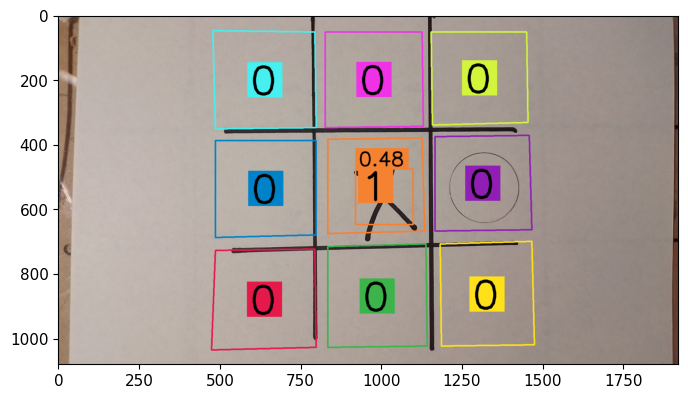

Board after 2 move
[[0 0 0]
 [0 1 2]
 [2 0 0]]



0: 1088x1920 4 crosss, 1191.7ms
Speed: 27.8ms preprocess, 1191.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1920, 1920)


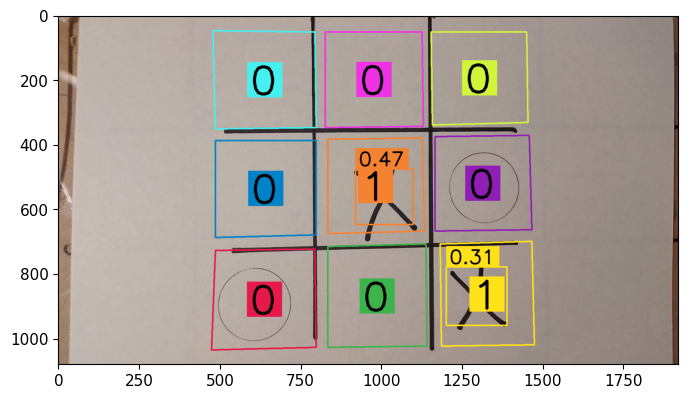

Board after 3 move
[[0 0 0]
 [2 1 2]
 [2 0 1]]



0: 1088x1920 5 crosss, 1283.9ms
Speed: 33.2ms preprocess, 1283.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1920, 1920)


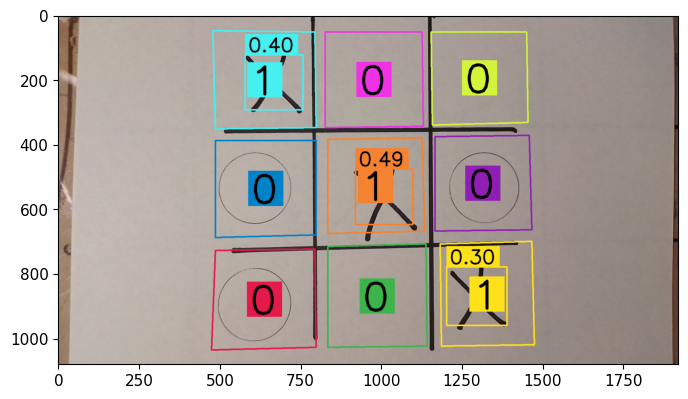

Winner is: 1


In [61]:
# Driver Code
print("Winner is: " + str(play_game()))